In [5]:
import os, shutil

In [6]:
train_dir = './train/'
validation_dir = './validation/'
test_dir = './test/'

train_cats_dir = './train/cats/'
train_dogs_dir = './train/dogs/'

validation_cats_dir = './validation/cats/'
validation_dogs_dir = './validation/dogs/'

test_cats_dir = './test/cats/'
test_dogs_dir = './test/dogs/'

In [7]:
print('total training images:', len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))
print('total validation images:', len(os.listdir(validation_cats_dir)) + len(os.listdir(validation_dogs_dir)))
print('total test images:', len(os.listdir(test_cats_dir)) + len(os.listdir(test_dogs_dir)))

total training images: 2000
total validation images: 1000
total test images: 1000


In [10]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total training images:', len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))
print()

print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total validation images:', len(os.listdir(validation_cats_dir)) + len(os.listdir(validation_dogs_dir)))
print()

print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))
print('total test images:', len(os.listdir(test_cats_dir)) + len(os.listdir(test_dogs_dir)))
print()

total training cat images: 1000
total training dog images: 1000
total training images: 2000

total validation cat images: 500
total validation dog images: 500
total validation images: 1000

total test cat images: 500
total test dog images: 500
total test images: 1000



In [12]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

## Build the first network

In [13]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

C:\Users\M I K E\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale pixel values from [0, 255] to [0, 1]
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

# The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=50,
    class_mode='binary') # because we use binary_crossentropy loss we need binary labels

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Lets look at the output of one of these generators. It yields batches of 224 x 224 RGB images (shape (50, 224, 224, 3)) and binary labels (shape (50,)). There are 50 samples in each batch (the batch size)

In [16]:
for data_batch, labels_batch in train_generator:
    print ('data batch shape:', data_batch.shape)
    print ('labels batch shape:', labels_batch.shape)
    break

data batch shape: (50, 224, 224, 3)
labels batch shape: (50,)


In [18]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=5,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=10) 

C:\Users\MIKE~1\AppData\Local\Temp/ipykernel_1052/505201094.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/2
5/5 [==============================] - 25s 5s/step - loss: 0.6981 - acc: 0.5120 - val_loss: 0.7002 - val_acc: 0.4960
Epoch 2/2
5/5 [==============================] - 25s 5s/step - loss: 0.6894 - acc: 0.5520 - val_loss: 0.7179 - val_acc: 0.4900


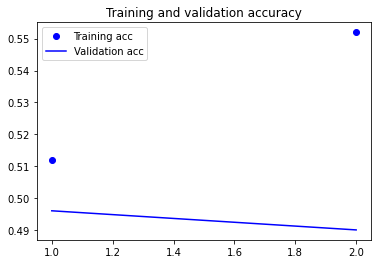

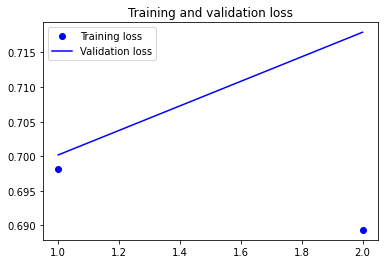

In [19]:
plot_accuracy_and_loss(history)

In [20]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


C:\Users\MIKE~1\AppData\Local\Temp/ipykernel_1052/924241788.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)


test acc: 0.5


## Add dropout

In [21]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # Note the change that we added dropout here
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

C:\Users\M I K E\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [22]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale pixel values from [0, 255] to [0, 1]
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

# The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=50,
    class_mode='binary') # because we use binary_crossentropy loss we need binary labels

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=50,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=5,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=10)

C:\Users\MIKE~1\AppData\Local\Temp/ipykernel_1052/3604967335.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/2
5/5 [==============================] - 25s 5s/step - loss: 0.6796 - acc: 0.5440 - val_loss: 0.6837 - val_acc: 0.5460
Epoch 2/2
5/5 [==============================] - 24s 5s/step - loss: 0.6927 - acc: 0.4760 - val_loss: 0.6744 - val_acc: 0.5420


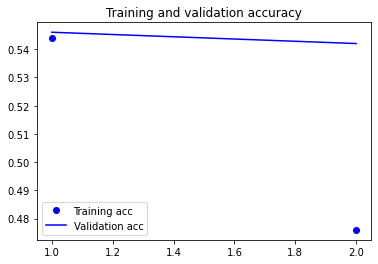

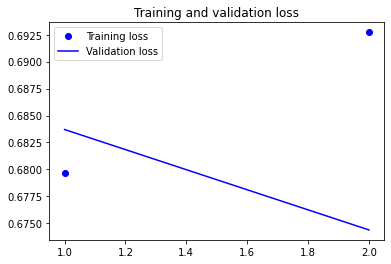

In [25]:
plot_accuracy_and_loss(history)

In [26]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


C:\Users\MIKE~1\AppData\Local\Temp/ipykernel_1052/924241788.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)


test acc: 0.5080000162124634


## Data augmentation

Generate a number of random transformations on an image and visualize what it looks like.

In [27]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

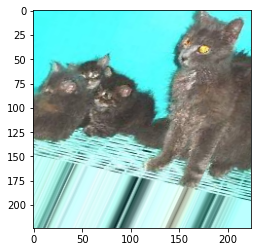

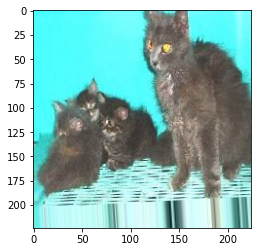

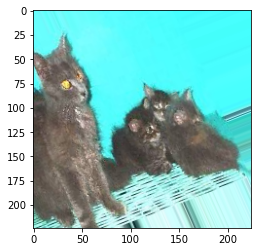

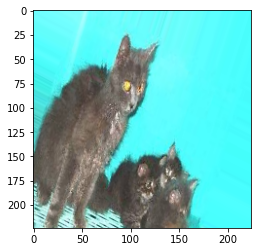

In [29]:
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[4] # Choose one image to augment

img = image.load_img(img_path, target_size=(224, 224)) # load image and resize it

x = image.img_to_array(img) # Convert to a Numpy array with shape (224, 224, 3)

x = x.reshape((1,) + x.shape)

# Generates batches of randomly transformed images.
# Loops indefinitely, so you need to break once four images have been created
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

## Build a model with data augmentation

### Augmented data show training images more than once per epoch (3x per epoch)

Idea here is we're increasing the size of the training set by making changes to existing images

In [30]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [31]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # Note that validation data should not be augmented

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=5,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=10)

C:\Users\MIKE~1\AppData\Local\Temp/ipykernel_1052/3604967335.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/2
5/5 [==============================] - 28s 6s/step - loss: 0.6939 - acc: 0.5000 - val_loss: 0.6900 - val_acc: 0.5240
Epoch 2/2
5/5 [==============================] - 27s 6s/step - loss: 0.6919 - acc: 0.5360 - val_loss: 0.6886 - val_acc: 0.5640


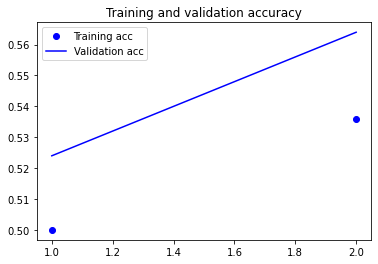

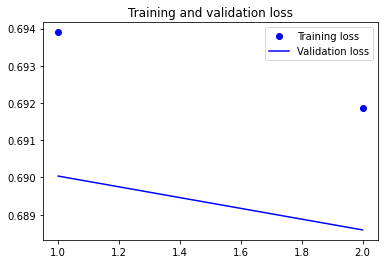

In [34]:
plot_accuracy_and_loss(history)

In [35]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


C:\Users\MIKE~1\AppData\Local\Temp/ipykernel_1052/924241788.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)


test acc: 0.5630000233650208
